In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('despesas.csv')

In [5]:
df.head()

,idade,sexo,bmi,filhos,fumante,regiao,gastos
0,19,mulher,27.9,0,sim,sudeste,16884.92
1,18,homem,33.8,1,nao,sul,1725.55
2,28,homem,33.0,3,nao,sul,4449.46
3,33,homem,22.7,0,nao,nordeste,21984.47
4,32,homem,28.9,0,nao,nordeste,3866.86


In [6]:
df.gastos.describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: gastos, dtype: float64

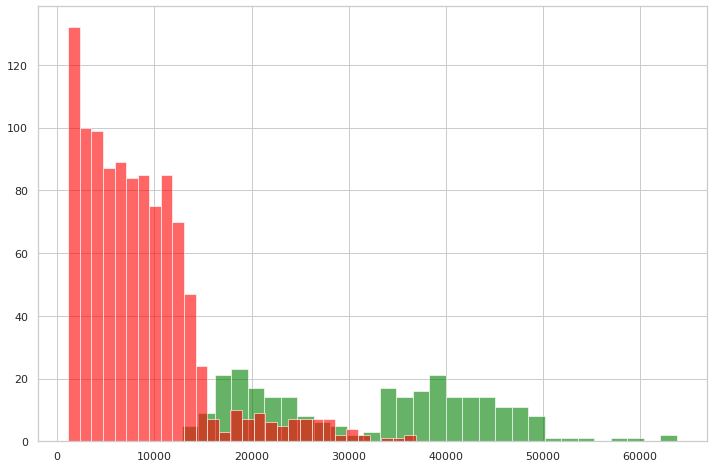

In [7]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
plt.hist(df[df.fumante == 'sim'].gastos, bins=30, color='green', alpha=0.6)
plt.hist(df[df.fumante == 'nao'].gastos, bins=30, color='red', alpha=0.6)
plt.show()

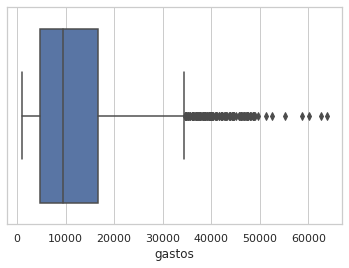

In [8]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
ax = sns.boxplot(x=df.gastos)

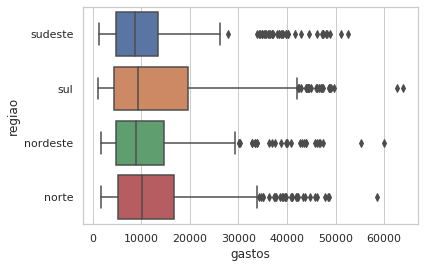

In [9]:
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.gastos, y=df.regiao)

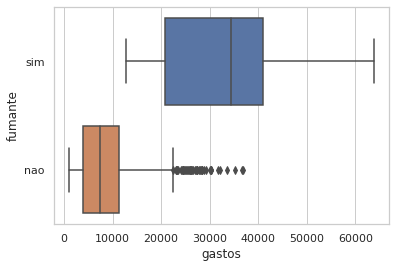

In [10]:
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.gastos, y=df.fumante)

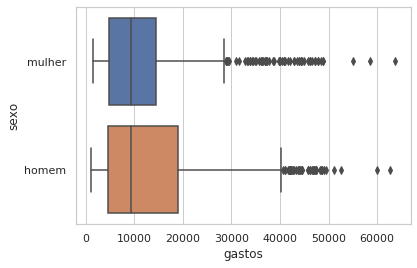

In [11]:
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.gastos, y=df.sexo)

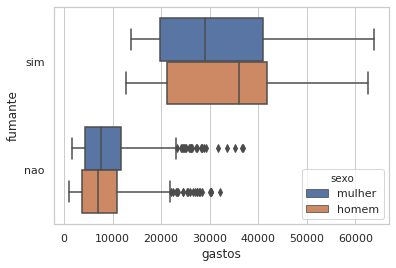

In [12]:
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x="gastos", 
                 y="fumante", 
                 hue="sexo", 
                 data=df, 
                 linewidth=1.5)

In [13]:
outlier_positive = df.gastos.mean() + (2*df.gastos.std())
outlier_negative = df.gastos.mean() - (2*df.gastos.std())

In [14]:
print('Outliers representam:',round((df[df.gastos > outlier_positive].gastos.sum() / df.gastos.sum())*100,2), '% da base')

Outliers representam: 26.46 % da base


In [15]:
# Function to calculate missing values by column (By DSA)
def missing_values_table(df):

    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"  "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.\n")
    
    if mis_val_table_ren_columns.shape[0] > 0:
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.



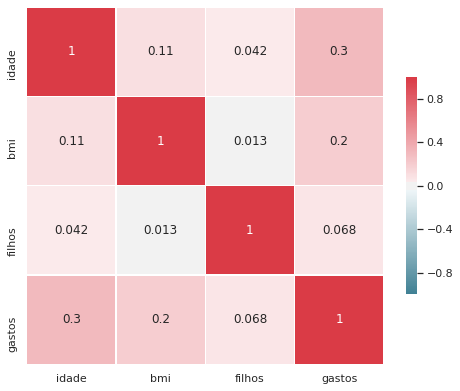

In [17]:
sns.set(style="whitegrid")

# Compute the correlation matrix
corr = df.corr()
    
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

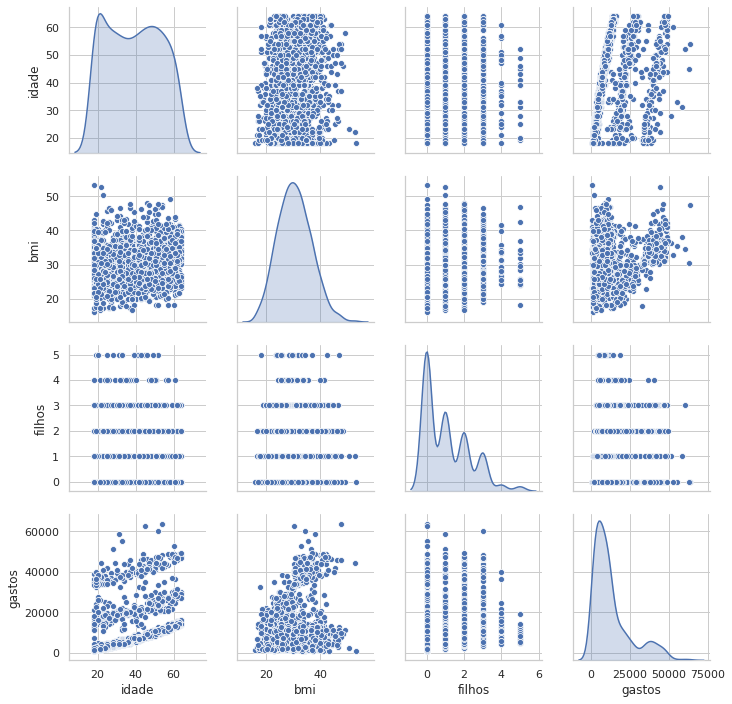

In [18]:
g = sns.pairplot(df, diag_kind="kde")

In [19]:
variaveis = df.columns

In [20]:
variaveis_num = []
variaveis_cat = []
for i in variaveis:
    if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
        variaveis_num.append(i)
    else:
        variaveis_cat.append(i)

In [21]:
variaveis_num

['idade', 'bmi', 'filhos', 'gastos']

In [22]:
variaveis_cat

['sexo', 'fumante', 'regiao']

In [23]:
for i in variaveis_cat:
    print('-',i,'-')
    print(df[i].value_counts(normalize = True).head(10))
    print('\n')

- sexo -
homem     0.505232
mulher    0.494768
Name: sexo, dtype: float64


- fumante -
nao    0.795217
sim    0.204783
Name: fumante, dtype: float64


- regiao -
sul         0.272048
sudeste     0.242900
nordeste    0.242900
norte       0.242152
Name: regiao, dtype: float64




In [24]:
for i in variaveis_num:
    print('-',i,'-')
    print(df[i].describe())
    print('\n')

- idade -
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: idade, dtype: float64


- bmi -
count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64


- filhos -
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: filhos, dtype: float64


- gastos -
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: gastos, dtype: float64




In [25]:
df_old = df

In [26]:
df_fumante = df[df.fumante == 'sim']
df_fumante.gastos = np.where(df_fumante.gastos > outlier_positive, df_fumante.gastos.median(), df_fumante.gastos)
df_nao_fumante = df[df.fumante == 'nao']
df_nao_fumante.gastos = np.where(df_nao_fumante.gastos > outlier_positive, df_nao_fumante.gastos.median(), df_nao_fumante.gastos)
df_new = pd.concat([df_fumante, df_nao_fumante])

/home/armindo/anaconda3/envs/qualirede2/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        
        return self.fit(X,y).transform(X)

In [28]:
def bmi30(x):
    if x > 30:
        return 1
    else:
        return 0

In [29]:
def transform_dataset(df):
    
    variaveis_num = []
    variaveis_cat = []
    for i in variaveis:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            variaveis_num.append(i)
        else:
            variaveis_cat.append(i)
    
    df_ = MultiColumnLabelEncoder(columns = variaveis_cat).fit_transform(df)
    
    df_['idade2'] = df_['idade']*2
    df_['bmi30'] = df.bmi.apply(lambda x: bmi30(x))
    
    return df_

In [30]:
df_train = transform_dataset(df_new)

In [31]:
df_train.head()

,idade,sexo,bmi,filhos,fumante,regiao,gastos,idade2,bmi30
0,19,1,27.9,0,1,2,16884.92,38,0
11,62,1,26.3,0,1,3,27808.73,124,0
14,27,0,42.1,0,1,3,34456.35,54,1
19,30,0,35.3,0,1,2,36837.47,60,1
23,34,1,31.9,1,1,1,34456.35,68,1


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle

In [33]:
X = df_train.loc[:,['idade', 'sexo', 'bmi', 'filhos', 'fumante', 'regiao', 'idade2', 'bmi30']].values

Y = df_train['gastos'].values

In [34]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

In [35]:
teste_size = 0.2
seed = 7

X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X_scaled, 
                                                                        Y, 
                                                                        test_size = teste_size, 
                                                                        random_state = seed)

In [36]:
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
pickle.dump(modelo_rf, open('qualirede_model.sav', 'wb'))

In [61]:
loaded_model = pickle.load(open('qualirede_model.sav', 'rb'))

In [37]:
r2_score(modelo_rf.predict(X_teste), Y_teste)

0.7709234406120553

/home/armindo/anaconda3/envs/qualirede2/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


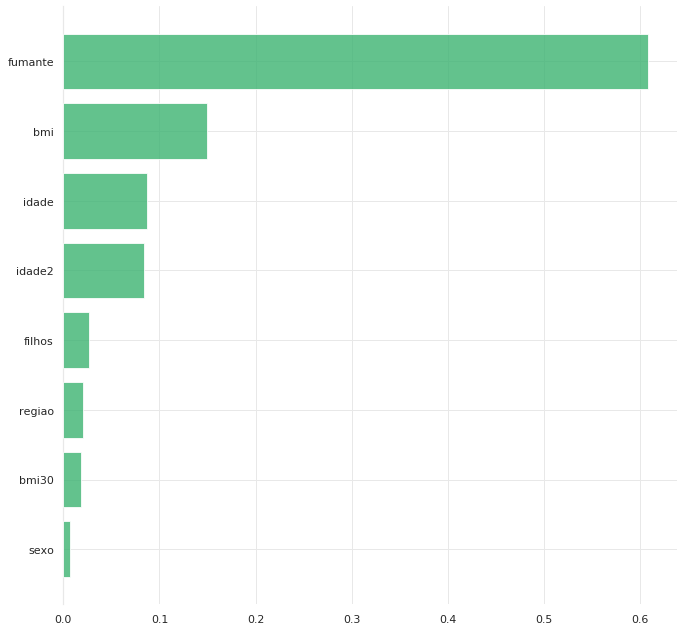

In [38]:
imp = df.loc[:,['idade', 'sexo', 'bmi', 'filhos', 'fumante', 'regiao', 'idade2', 'bmi30']]

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(11,11)

features = list(imp.columns)
importances = modelo_rf.feature_importances_

list_ = []
for i in range(0,len(importances)):
    list_.append((features[i], importances[i])) 

list_aux = sorted(list_, key=lambda x: x[1])

features_ = []
importances_ = []

for i in list_aux:
    #print(i[1])
    features_.append(i[0])
    importances_.append(i[1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#E8E8E8')
#ax.spines['bottom'].set_color('#E8E8E8')
ax.spines['bottom'].set_visible(False)

ax.grid(which='major', color='#E8E8E8') #axis='x', linestyle='--',
plt.barh(features_, importances_, zorder=3, color='#3CB371', alpha = 0.8) #color='#D7172F', edgecolor='#D7172F',  zorder=3)

#plt.savefig('/home/armindoguerra/Downloads/grafico.png', dpi=150 , transparent=True)
plt.show()